In [35]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [36]:
labels = []
ripeness_class_name = ['Early Ripe', 'Partially Ripe'
                        ,'Ripe', 'Decay']

In [37]:
df = pd.read_csv('data.csv')

<h1>TCS34725 Data</h1>

All ranges are in nm


![alt text](nir-band-erf-community_636774556093727541.jpg "Ranges")



We can infere:

600nm Above is Red

500-600nm is Green

and <500nm is Blue

In [44]:
#we have to normalise bgr to 0-255
#fetch max
column = df["Blue"]
max_b = column.max()

column = df["Red"]
max_r = column.max()

column = df["Green"]
max_g = column.max()

In [45]:

df["Blue"] = (df["Blue"]/max_b)*255

df["Red"] = (df["Red"]/max_r)*255

df["Green"] = (df["Green"]/max_g)*255


In [48]:
some_frame = pd.read_csv('final.csv')

,NIR_1,NIR_2,Ripeness,Blue,Green,Red
0,54,66,0,7.391304,20.485,11.7300
1,62,58,0,9.327122,30.005,14.0250
2,68,54,0,10.734990,32.215,14.0250
3,227,215,0,54.554865,220.065,204.5100
4,126,129,0,27.453416,158.525,133.8750
...,...,...,...,...,...,...
325,4,0,3,0.351967,0.000,1.5300
326,10,10,3,1.583851,5.525,7.7775
327,16,8,3,1.935818,0.510,0.8925
328,12,10,3,1.407867,0.510,1.2750


In [49]:
df = some_frame[['Red','Green','Blue','NIR_1','NIR_2','Ripeness']]

In [50]:
df

,Red,Green,Blue,NIR_1,NIR_2,Ripeness
0,11.7300,20.485,7.391304,54,66,0
1,14.0250,30.005,9.327122,62,58,0
2,14.0250,32.215,10.734990,68,54,0
3,204.5100,220.065,54.554865,227,215,0
4,133.8750,158.525,27.453416,126,129,0
...,...,...,...,...,...,...
325,1.5300,0.000,0.351967,4,0,3
326,7.7775,5.525,1.583851,10,10,3
327,0.8925,0.510,1.935818,16,8,3
328,1.2750,0.510,1.407867,12,10,3


In [51]:
df.to_csv('Final1.csv')

In [52]:
df = pd.read_csv('Final1.csv')

In [53]:
df

,Unnamed: 0,Red,Green,Blue,NIR_1,NIR_2,Ripeness
0,0,11.7300,20.485,7.391304,54,66,0
1,1,14.0250,30.005,9.327122,62,58,0
2,2,14.0250,32.215,10.734990,68,54,0
3,3,204.5100,220.065,54.554865,227,215,0
4,4,133.8750,158.525,27.453416,126,129,0
...,...,...,...,...,...,...,...
325,325,1.5300,0.000,0.351967,4,0,3
326,326,7.7775,5.525,1.583851,10,10,3
327,327,0.8925,0.510,1.935818,16,8,3
328,328,1.2750,0.510,1.407867,12,10,3


In [54]:
inputs = []
for i in range(len(df)):
    inputs.append([int(df['Red'][i]),int(df['Blue'][i]),int(df['Green'][i])])

inputs = np.asarray(inputs)

In [55]:
inputs

array([[ 11,   7,  20],
       [ 14,   9,  30],
       [ 14,  10,  32],
       [204,  54, 220],
       [133,  27, 158],
       [203,  50, 217],
       [255, 107, 255],
       [255, 114, 255],
       [255,  87, 238],
       [255,  53, 155],
       [255,  65, 181],
       [255,  53, 146],
       [124,  17,  64],
       [ 43,   7,  15],
       [129,  18,  60],
       [114,  12,  24],
       [139,  14,  50],
       [199,  77, 155],
       [255,  44, 120],
       [255,  54, 135],
       [255,  60, 179],
       [255,  67, 184],
       [225,  26,  74],
       [255,  67, 184],
       [255,  67, 184],
       [255,  42,  57],
       [255,  35,  28],
       [255,  45,  62],
       [243,  43, 191],
       [224,  31, 143],
       [  2,   1,   0],
       [  8,   6,   6],
       [  1,   1,   0],
       [ 52,  27,  90],
       [  9,   6,  19],
       [ 14,  11,  27],
       [227,  75, 246],
       [191,  42, 210],
       [126,  27, 152],
       [255,  87, 242],
       [255,  71, 220],
       [255,  77

In [56]:
labels = df.pop('Ripeness')

In [57]:
labels = np.asarray(labels)

In [58]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,

In [59]:
len(labels)

330

In [60]:
len(inputs)

330

In [61]:
inputs.shape

(330, 3)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.05)

In [207]:
X_train

array([[ 23,  20,  34],
       [255,  45,  62],
       [231,  41, 142],
       [242,  81, 242],
       [142,  14,  39],
       [255, 102, 190],
       [255,  76, 183],
       [133,  27, 158],
       [255,  38,  41],
       [222,  52, 150],
       [255,  47, 196],
       [182,  24,  50],
       [255,  74, 188],
       [143,  16,  73],
       [232,  30,  84],
       [255,  71, 188],
       [ 17,  15,  25],
       [217,  35, 177],
       [224,  33, 155],
       [199,  77, 155],
       [  0,   0,   0],
       [242,  48, 163],
       [  2,   0,   0],
       [255,  35, 102],
       [ 43,   7,  15],
       [224,  31, 143],
       [198,  19,  12],
       [230,  81, 235],
       [  9,   0,   2],
       [236,  20,  21],
       [148,  13,  33],
       [119,  15,  54],
       [114,  12,  24],
       [177,  23,  63],
       [  1,   1,   0],
       [ 25,  17,  46],
       [  1,   1,   0],
       [255,  83, 160],
       [222,  93, 215],
       [ 91,  39, 125],
       [255, 107, 255],
       [255,  35

In [208]:
y_train

array([0, 2, 1, 0, 1, 1, 1, 0, 2, 1, 3, 2, 1, 2, 2, 1, 0, 3, 3, 1, 3, 1,
       3, 2, 1, 2, 2, 0, 3, 2, 2, 1, 1, 1, 3, 0, 3, 2, 1, 0, 0, 2, 2, 2,
       1, 2, 3, 0, 0, 0, 3, 2, 0, 0, 2, 2, 1, 2, 1, 3, 1, 2, 3, 2, 2, 0,
       3, 1, 2, 2, 1, 2, 1, 2, 3, 2, 3, 0, 0, 3, 1, 3, 2, 0, 1, 2, 0, 0,
       2, 2, 0, 1, 2, 3, 0, 1, 0, 1, 1, 0, 1, 3, 0, 0, 3, 3, 3, 1, 0, 1,
       3, 2, 1, 0, 0, 2, 0, 0, 2, 1, 2, 2, 3, 0, 1, 1, 3, 2, 2, 0, 0, 3,
       2, 0, 0, 2, 0, 0, 1, 3, 1, 1, 0, 3, 2, 1, 3, 2, 1, 2, 3, 0, 3, 0,
       0, 0, 1, 0, 0, 1, 1, 3, 1, 3, 1, 0, 1, 3, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 3, 3, 0, 1, 2, 1, 2, 1, 0, 3, 2, 2, 0, 0, 2, 2, 0, 1,
       1, 3, 1, 1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 3, 0, 1, 1, 3, 2, 0, 3, 2,
       2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 1, 0, 2, 0, 3, 0, 3, 0, 2, 0, 0,
       1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 3, 0, 3, 3, 1, 0, 1, 0, 1, 0, 2, 3, 3,
       1, 3, 0, 1, 0, 0, 2, 2, 2, 1, 1, 3, 3, 0, 2,

In [209]:
model = keras.Sequential([
        keras.Input(shape=(3,)),
        keras.layers.Dense(16),
        keras.layers.Dense(32),
        keras.layers.Dense(64),
        keras.layers.Dense(128),
        keras.layers.Dense(256),
        keras.layers.Dense(4,activation='softmax')
        ])

In [210]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [211]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 16)                64        
                                                                 
 dense_67 (Dense)            (None, 32)                544       
                                                                 
 dense_68 (Dense)            (None, 64)                2112      
                                                                 
 dense_69 (Dense)            (None, 128)               8320      
                                                                 
 dense_70 (Dense)            (None, 256)               33024     
                                                                 
 dense_71 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 45,092
Trainable params: 45,092
Non-tra

In [222]:
history = model.fit(X_train,y_train,epochs=44,batch_size=2,validation_data=(X_test,y_test))

Epoch 1/44
157/157 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.7955 - val_loss: 0.4435 - val_accuracy: 0.8235
Epoch 2/44
157/157 [==============================] - 0s 1ms/step - loss: 0.4906 - accuracy: 0.7859 - val_loss: 0.3900 - val_accuracy: 0.8235
Epoch 3/44
157/157 [==============================] - 0s 1ms/step - loss: 0.7259 - accuracy: 0.7604 - val_loss: 0.4624 - val_accuracy: 0.8235
Epoch 4/44
157/157 [==============================] - 0s 1ms/step - loss: 0.5326 - accuracy: 0.7764 - val_loss: 0.4168 - val_accuracy: 0.8824
Epoch 5/44
157/157 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.7859 - val_loss: 0.5694 - val_accuracy: 0.7647
Epoch 6/44
157/157 [==============================] - 0s 1ms/step - loss: 0.5016 - accuracy: 0.7732 - val_loss: 0.5100 - val_accuracy: 0.8824
Epoch 7/44
157/157 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.7764 - val_loss: 0.4831 - val_accuracy: 0.8235
Epoch 

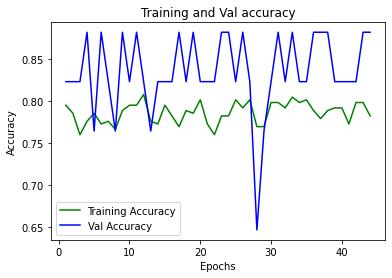

In [223]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,45)
plt.plot(epochs,loss_train,'g',label = "Training Accuracy")
plt.plot(epochs,loss_val,'b',label = "Val Accuracy")
plt.title('Training and Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [224]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Loss:',score[0])
print('Accuracy:',score[1])

Loss: 0.467608779668808
Accuracy: 0.8823529481887817


In [225]:
model.save('new.h5')

In [101]:
ripeness_detector = keras.models.load_model('new.h5')

In [102]:
score = ripeness_detector.evaluate(X_test,y_test,verbose=0)
print('Loss:',score[0])
print('Accuracy:',score[1])

Loss: 0.20008975267410278
Accuracy: 0.9411764740943909


In [107]:
array = np.array([[0,1,2],[255,10,23],[203,210,33],[100,100,100],[0,255,30]])

In [108]:
predictions = ripeness_detector(array)

In [109]:
ripeness_class_name = ['Early Ripe','Partially Ripe','Ripe','Decay']

In [110]:
for i in range(len(array)):
    print("Input["+str(i+1)+"]",ripeness_class_name[np.argmax(predictions[i])])

Input[1] Decay
Input[2] Ripe
Input[3] Ripe
Input[4] Early Ripe
Input[5] Partially Ripe
